# 第I部
# 第6章 2つの平均値を比較する

In [1]:
pkgs <- c("pipeR", "dplyr", "tidyr", "ggplot2", "readr", "readxl")
lapply(pkgs, require, character.only = TRUE)

Loading required package: pipeR
Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: tidyr
Loading required package: ggplot2
Loading required package: readr
Loading required package: readxl


[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

## 6.2 独立な2群の $t$ 検定

平均値差の統計分布は，

$$ \bar{X_1} - \bar{X_2} \sim N\left( \mu_1 - \mu_2, \sigma^2 \left( \frac{1}{n_1} + \frac{1}{n_2} \right) \right)$$

となる．

標準化すると，

$$\frac{\bar{X_1} - \bar{X_2} - (\mu_1 - \mu_2)}{\sigma \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} \sim N(0, 1)$$

となる．

母標準偏差 $\sigma$ は次の $\hat{\sigma}^2_\mathrm{pooled}$ で推定する．

$$ \hat{\sigma}^2_\mathrm{pooled} = \frac{(n_1 - 1) \hat{\sigma}_1^2 + (n_2 - 1) \hat{\sigma}_2^2}{n_1 + n_2 - 2}$$

検定統計量 $t$ は，以下のようになる．

$$ t = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{\frac{(n_1 - 1)\hat{\sigma}_1^2 + (n_2 - 1)\hat{\sigma}_2^2}{n_1 + n_2 - 2}\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}$$

$t$ は帰無仮説 $\mu_1 = \mu_2$ のもとで，自由度n<sub>1</sub> + n<sub>2</sub> - 2 の $t$ 分布に従う．

In [2]:
d <- read_csv("teaching_methods.csv")
names(d) <- c("id", "name", "sex","math", "stat", "psy_test", "stat_test1", "stat_test2", "teaching_method")
str(d)

Classes 'tbl_df', 'tbl' and 'data.frame':	20 obs. of  9 variables:
 $ id             : int  1 2 3 4 5 6 7 8 9 10 ...
 $ name           : chr  "大村" "本多" "川崎" "多村" ...
 $ sex            : chr  "男" "男" "男" "男" ...
 $ math           : chr  "嫌い" "嫌い" "好き" "好き" ...
 $ stat           : chr  "好き" "好き" "好き" "好き" ...
 $ psy_test       : int  13 14 7 12 10 6 8 15 4 14 ...
 $ stat_test1     : int  6 10 6 10 5 3 5 9 3 3 ...
 $ stat_test2     : int  10 13 8 15 8 6 9 10 7 3 ...
 $ teaching_method: chr  "C" "B" "B" "A" ...


In [3]:
stat_test1.male <- d %>>% filter(sex == "男") %>>% (stat_test1)
stat_test1.female <- d %>>% filter(sex == "女") %>>% (stat_test1)
stat_test1.male
stat_test1.female

[1]  6 10  6 10  5  3  5  9  3  3

[1] 11  6 11  9  7  5  8  7  7  9

検定統計量 $t$

In [4]:
n1 <- length(stat_test1.male)
n2 <- length(stat_test1.female)

t.a <- mean(stat_test1.male) - mean(stat_test1.female)

t.b <- (n1 - 1)*var(stat_test1.male) + (n2 - 1) * var(stat_test1.female)
t.c <- n1 + n2 - 2
sigma.pooled <- sqrt(t.b / t.c)

t.d <- (1 / n1 + 1 / n2)

t <- t.a / sigma.pooled / sqrt(t.d)
t

[1] -1.842885

棄却域

In [5]:
lower <- qt(0.05 / 2, n1 + n2 - 2)
upper <- qt(0.05 / 2, n1 + n2 - 2, lower.tail = FALSE)
cat("t < ", lower, ", t > ", upper)

t <  -2.100922 , t >  2.100922

In [6]:
options(repr.plot.width = 4, repr.plot.height = 4)

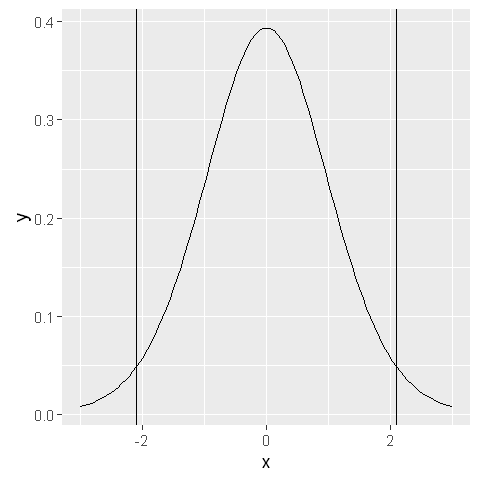

In [7]:
ggplot(data.frame(x = c(-3, 3)), aes(x)) + 
    stat_function(fun = dt, args = list(df = n1 + n2 - 2)) + 
    geom_vline(xintercept = c(qt(0.025, df = n1 + n2 - 2), qt(0.975, df = n1 + n2 - 2)))

帰無仮説を棄却できない．
男女で統計テスト1の得点に有意差があるとは言えない．

$p$ 値は，

In [8]:
2 * pt(t, df = n1 + n2 - 2)

[1] 0.08187801

`t.test()` を使う

In [9]:
t.test(stat_test1.male, stat_test1.female, var.equal = TRUE)


	Two Sample t-test

data:  stat_test1.male and stat_test1.female
t = -1.8429, df = 18, p-value = 0.08188
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.2800355  0.2800355
sample estimates:
mean of x mean of y 
        6         8 


## 6.3 $t$検定の前提条件

* 無作為抽出
* 正規性
* 分散の等質性

### 6.3.1 分散の等質性

In [10]:
classA <- c(54, 55, 52, 48, 50, 38, 41, 40, 53, 52)
classB <- c(67, 63, 50, 60, 61, 69, 43, 58, 36, 29)
var.test(classA, classB)


	F test to compare two variances

data:  classA and classB
F = 0.21567, num df = 9, denom df = 9, p-value = 0.03206
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.05356961 0.86828987
sample estimates:
ratio of variances 
         0.2156709 


帰無仮説（母分散が等質である）が棄却されたので，Welchの$t$検定を用いる．

## 6.3.2 Welchの$t$検定

In [11]:
t.test(classA, classB, var.equal = FALSE)


	Welch Two Sample t-test

data:  classA and classB
t = -1.1191, df = 12.71, p-value = 0.2838
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -15.554888   4.954888
sample estimates:
mean of x mean of y 
     48.3      53.6 


帰無仮説を棄却できないので，平均に差があるとは言えない

## 6.4 対応のある$t$検定

グループ1の得点をX<sub>1</sub>，グループ2の得点をX<sub>2</sub>とすると，差Dは，

$$D = X_2 - X_1$$

となる．標本平均を考えると，

$$ \bar{D} = \bar{X}_2 - \bar{X}_1 $$

となる．

In [12]:
stat_test1 <- d$stat_test1
stat_test2 <- d$stat_test2
diff.stat12 <- stat_test2 - stat_test1
diff.stat12

[1]  4  3  2  5  3  3  4  1  4  0  7  8  7  2  5  0 -1  5  0 -2

In [13]:
mean(stat_test1)

[1] 7

In [14]:
mean(stat_test2)

[1] 10

In [15]:
mean(diff.stat12)

[1] 3

統計検定量は，

$$ D \sim N \left( \mu_D, \sigma^2_D \right) $$

とすれば

$$ \bar{D} \sim N \left( \mu_D, \frac{\sigma^2_D}{n} \right) $$

これを標準化すると

$$ Z = \frac{\bar{D} - \mu_D}{\sigma_D / \sqrt{n}} $$

は $N(0, 1)$ にしたがう．

よって，

$$ t = \frac{\bar{D} - \mu_D}{\hat{\sigma}_D / \sqrt{n}}  $$

は $df$ = n - 1 の$t$ 分布にしたがう．

### 例題

* 帰無仮説のもとでは，$\mu_D = 0$

In [16]:
n <- length(diff.stat12)
a <- mean(diff.stat12)
b <- sd(diff.stat12) / sqrt(n)
t <- a / b
t

[1] 4.839903

棄却域は，

In [17]:
lower <- qt(0.05 / 2, df = n - 1)
upper <- qt(0.05 / 2, df = n - 1, lower.tail = FALSE)
cat("t < ", lower, ", t > ", upper)

t <  -2.093024 , t >  2.093024

なので，棄却域に入る

In [18]:
options(repr.plot.width = 4, repr.plot.height = 4)

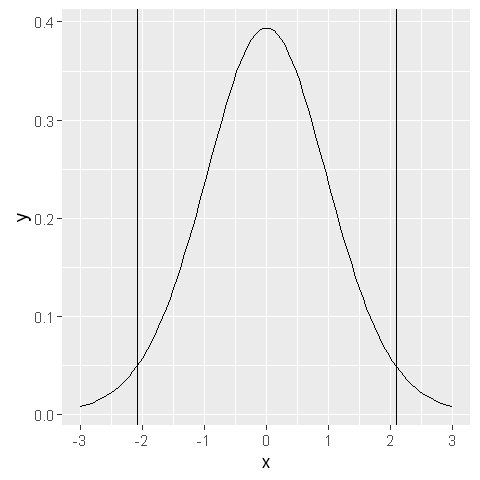

In [19]:
ggplot(data.frame(x = c(-3, 3)), aes(x)) +
    stat_function(fun = dt, args = list(df = n - 1)) + 
    scale_x_continuous(breaks = c(-3:3, 1)) + 
    geom_vline(xintercept = c(qt(0.025, df = n - 1), qt(0.975, df = n - 1)))

In [20]:
t.test(diff.stat12)


	One Sample t-test

data:  diff.stat12
t = 4.8399, df = 19, p-value = 0.0001138
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 1.702645 4.297355
sample estimates:
mean of x 
        3 


In [21]:
t.test(stat_test1, stat_test2, paired = TRUE)


	Paired t-test

data:  stat_test1 and stat_test2
t = -4.8399, df = 19, p-value = 0.0001138
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.297355 -1.702645
sample estimates:
mean of the differences 
                     -3 


* 対応なし，とみなしした場合

In [22]:
var.test(stat_test1, stat_test2)


	F test to compare two variances

data:  stat_test1 and stat_test2
F = 0.3913, num df = 19, denom df = 19, p-value = 0.04733
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1548830 0.9886112
sample estimates:
ratio of variances 
         0.3913043 


分散は同じだとは言えない

In [23]:
t.test(stat_test1, stat_test2, var.equal = FALSE)


	Welch Two Sample t-test

data:  stat_test1 and stat_test2
t = -2.763, df = 31.895, p-value = 0.009429
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.2119742 -0.7880258
sample estimates:
mean of x mean of y 
        7        10 


## 練習問題

### （1）

In [24]:
stat_test1.like <- d %>>% filter(stat == "好き") %>>% (stat_test1)
stat_test1.dislike <- d %>>% filter(stat == "嫌い") %>>% (stat_test1)
stat_test1.like
stat_test1.dislike

[1]  6 10  6 10 11  6 11  7

[1] 5 3 5 9 3 3 9 5 8 7 7 9

In [25]:
var.test(stat_test1.like, stat_test1.dislike)


	F test to compare two variances

data:  stat_test1.like and stat_test1.dislike
F = 0.94598, num df = 7, denom df = 11, p-value = 0.9781
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.2516814 4.4550605
sample estimates:
ratio of variances 
         0.9459792 


In [26]:
t.test(stat_test1.like, stat_test1.dislike, var.equal = TRUE)


	Two Sample t-test

data:  stat_test1.like and stat_test1.dislike
t = 2.1218, df = 18, p-value = 0.048
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.02250531 4.56082802
sample estimates:
mean of x mean of y 
 8.375000  6.083333 


2群の平均値には差がある

### （2）

In [27]:
psy_test.male <- d %>>% filter(sex == "男") %>>% (psy_test)
psy_test.female <- d %>>% filter(sex == "女") %>>% (psy_test)
psy_test.male
psy_test.female

[1] 13 14  7 12 10  6  8 15  4 14

[1]  9  6 10 12  5 12  8  8 12 15

In [28]:
var.test(psy_test.male, psy_test.female)


	F test to compare two variances

data:  psy_test.male and psy_test.female
F = 1.5575, num df = 9, denom df = 9, p-value = 0.5196
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.3868588 6.2704508
sample estimates:
ratio of variances 
          1.557491 


In [29]:
t.test(psy_test.male, psy_test.female, var.equal = TRUE)


	Two Sample t-test

data:  psy_test.male and psy_test.female
t = 0.38359, df = 18, p-value = 0.7058
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.686225  3.886225
sample estimates:
mean of x mean of y 
     10.3       9.7 


男女で有意な差があるとは言えない

### （3）

In [30]:
before <- stringr::str_split("61 50 41 55 51 48 46 55 65 70", pattern = " ")[[1]] %>>% as.numeric
after <- stringr::str_split("59 48 33 54 47 52 38 50 64 63", pattern = " ")[[1]] %>>% as.numeric
before
after

[1] 61 50 41 55 51 48 46 55 65 70

[1] 59 48 33 54 47 52 38 50 64 63

In [31]:
t.test(before, after, paired = TRUE)


	Paired t-test

data:  before and after
t = 2.8465, df = 9, p-value = 0.0192
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.6980082 6.1019918
sample estimates:
mean of the differences 
                    3.4 


前後の平均値が異なる

In [32]:
mean(before)
mean(after)

[1] 54.2

[1] 50.8

効果があった

In [33]:
devtools::session_info()

Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------
Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------


 setting  value                       
 version  R version 3.2.3 (2015-12-10)
 system   x86_64, mingw32             
 ui       RTerm                       
 language en                          
 collate  Japanese_Japan.932          
 tz       Asia/Tokyo                  
 date     2016-05-24                  

 package    * version date       source                            
 assertthat   0.1     2013-12-06 CRAN (R 3.2.1)                    
 base64enc    0.1-3   2015-07-28 CRAN (R 3.2.2)                    
 colorspace   1.2-6   2015-03-11 CRAN (R 3.2.1)                    
 DBI          0.3.1   2014-09-24 CRAN (R 3.2.1)                    
 devtools     1.10.0  2016-01-23 CRAN (R 3.2.3)                    
 digest       0.6.9   2016-01-08 CRAN (R 3.2.3)                    
 dplyr      * 0.4.3   2015-09-01 CRAN (R 3.2.2)                    
 evaluate     0.8     2015-09-18 CRAN (R 3.2.2)                    
 ggplot2    * 2.0.0   2015-12-18 CRAN (R 3.2.3)                    
 gtable